### Load Packages

In [516]:
import numpy as np
import xarray as xr
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [333]:
cd /Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts

/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts


In [334]:
from post_processing_fns import *
from letkf import *

In [2]:
these_columns = {
  'lons' : [-154.5, 35.5, 75.5, -150.5, 160.5],
  'lats' : [-27.5, -49.5, -31.5, 12.5, 40.5],
  'name' : ['South Pacific', 'Southern Ocean', 'Indian Ocean', 'Tropical Pacific', 'North Pacific'],
  'save_name' : ['south_pacific2', 'southern_ocean2', 'indian_ocean2', 'tropical_pacific2', 'north_pacific']
}

In [4]:
## Where are we working
proj_dir = '/Users/zstanley/Documents/git_repos/obs_loc_for_scda'
plot_dir = proj_dir + '/plots/isda_poster'
my_data_dir = proj_dir + '/my_data/20151206.030000'
nb_dir = proj_dir + '/notebooks'

### Define colors

In [77]:
raisin_black = [45/256, 42/256, 50/256]
heliotrope_gray = [162/256, 155/256, 171/256]
pacific_blue = [37/256, 162/256, 192/256]
deep_saffron = [255/256, 145/256, 51/256]

### Plot T-T correlations

In [5]:
sst_ast_corr = xr.open_dataset(my_data_dir+'/sst_ast_corr.nc')

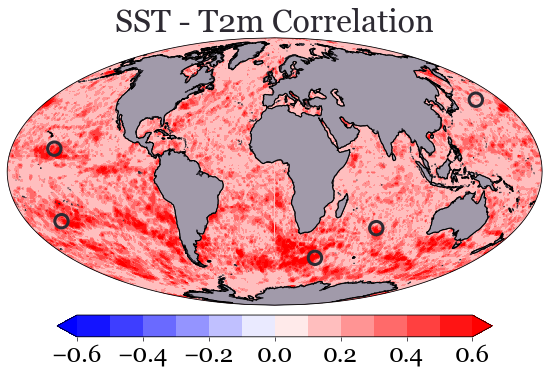

In [73]:
## Save a map of the world showing column locations
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_global()
im = ax.contourf(sst_ast_corr['lon'], sst_ast_corr['lat'], sst_ast_corr['__xarray_dataarray_variable__'], levels = np.linspace(-0.6,0.6,13),cmap='bwr', extend='both',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor=raisin_black, facecolor=heliotrope_gray))
cbar = plt.colorbar(im, orientation='horizontal', pad=0.03, shrink=0.65, extend='both')
cbar.ax.tick_params(labelsize=24, color=raisin_black)
plt.title('SST - T2m Correlation', fontsize=32, color=raisin_black)
ax.coastlines(resolution='110m')
#ax.gridlines()
ax.scatter(these_columns['lons'], these_columns['lats'],transform=ccrs.PlateCarree(),facecolors='none', edgecolors=raisin_black, s=180, linewidth=3)

plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams.update({'font.sans-serif':'Georgia'})
plt.savefig(plot_dir+'/sst_ast_corr_with_column_locations.pdf')
plt.show()

### Plot vertical correlations

In [74]:
## Load vertical columns
south_pacific = xr.open_dataset(my_data_dir+'/five_columns_'+these_columns['save_name'][0]+'.nc')
southern_ocean = xr.open_dataset(my_data_dir+'/five_columns_'+these_columns['save_name'][1]+'.nc')
indian_ocean = xr.open_dataset(my_data_dir+'/five_columns_'+these_columns['save_name'][2]+'.nc')
tropical_pacific = xr.open_dataset(my_data_dir+'/five_columns_'+these_columns['save_name'][3]+'.nc')
north_pacific = xr.open_dataset(my_data_dir+'/five_columns_'+these_columns['save_name'][4]+'.nc')

In [75]:
## South Pacific
sp_corr = xr.Dataset()
sp_corr['sst_atm_T'] = xr.corr(south_pacific['sst'], south_pacific['atm_T'], dim = 'ens_mem')
sp_corr['sst_ocn_T'] = xr.corr(south_pacific['sst'], south_pacific['ocn_Temp'], dim = 'ens_mem')
sp_corr['ast_atm_T'] = xr.corr(south_pacific['atm_t2m'], south_pacific['atm_T'], dim = 'ens_mem')
sp_corr['ast_ocn_T'] = xr.corr(south_pacific['atm_t2m'], south_pacific['ocn_Temp'], dim = 'ens_mem')
sp_corr['atm_p'] = south_pacific['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
sp_corr = sp_corr.mean(['lat', 'lon'])

## Southern Ocean
so_corr = xr.Dataset()
so_corr['sst_atm_T'] = xr.corr(southern_ocean['sst'], southern_ocean['atm_T'], dim = 'ens_mem')
so_corr['sst_ocn_T'] = xr.corr(southern_ocean['sst'], southern_ocean['ocn_Temp'], dim = 'ens_mem')
so_corr['ast_atm_T'] = xr.corr(southern_ocean['atm_t2m'], southern_ocean['atm_T'], dim = 'ens_mem')
so_corr['ast_ocn_T'] = xr.corr(southern_ocean['atm_t2m'], southern_ocean['ocn_Temp'], dim = 'ens_mem')
so_corr['atm_p'] = southern_ocean['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
so_corr = so_corr.mean(['lat', 'lon'])

## Indian Ocean
io_corr = xr.Dataset()
io_corr['sst_atm_T'] = xr.corr(indian_ocean['sst'], indian_ocean['atm_T'], dim = 'ens_mem')
io_corr['sst_ocn_T'] = xr.corr(indian_ocean['sst'], indian_ocean['ocn_Temp'], dim = 'ens_mem')
io_corr['ast_atm_T'] = xr.corr(indian_ocean['atm_t2m'], indian_ocean['atm_T'], dim = 'ens_mem')
io_corr['ast_ocn_T'] = xr.corr(indian_ocean['atm_t2m'], indian_ocean['ocn_Temp'], dim = 'ens_mem')
io_corr['atm_p'] = indian_ocean['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
io_corr = io_corr.mean(['lat', 'lon'])

## Tropical Pacific
tp_corr = xr.Dataset()
tp_corr['sst_atm_T'] = xr.corr(tropical_pacific['sst'], tropical_pacific['atm_T'], dim = 'ens_mem')
tp_corr['sst_ocn_T'] = xr.corr(tropical_pacific['sst'], tropical_pacific['ocn_Temp'], dim = 'ens_mem')
tp_corr['ast_atm_T'] = xr.corr(tropical_pacific['atm_t2m'], tropical_pacific['atm_T'], dim = 'ens_mem')
tp_corr['ast_ocn_T'] = xr.corr(tropical_pacific['atm_t2m'], tropical_pacific['ocn_Temp'], dim = 'ens_mem')
tp_corr['atm_p'] = tropical_pacific['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
tp_corr = tp_corr.mean(['lat', 'lon'])

## North Pacific
np_corr = xr.Dataset()
np_corr['sst_atm_T'] = xr.corr(north_pacific['sst'], north_pacific['atm_T'], dim = 'ens_mem')
np_corr['sst_ocn_T'] = xr.corr(north_pacific['sst'], north_pacific['ocn_Temp'], dim = 'ens_mem')
np_corr['ast_atm_T'] = xr.corr(north_pacific['atm_t2m'], north_pacific['atm_T'], dim = 'ens_mem')
np_corr['ast_ocn_T'] = xr.corr(north_pacific['atm_t2m'], north_pacific['ocn_Temp'], dim = 'ens_mem')
np_corr['atm_p'] = north_pacific['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
np_corr = np_corr.mean(['lat', 'lon'])

In [76]:
## Get indices
# atmosphere
num_atm_levs = len(south_pacific['atm_lev'])
indt2m = num_atm_levs - 1
ind100hPa = np.argmin(np.abs(sp_corr['atm_p'].values-100))
# ocean
ind0m = num_atm_levs
ind150m_ocn = np.argmin(np.abs(sp_corr['ocn_lev'].values-150))
ind500m_ocn = np.argmin(np.abs(sp_corr['ocn_lev'].values-500))
ind150m = ind0m + ind150m_ocn
ind500m = ind0m + ind500m_ocn
num_ocn_levs = len(south_pacific['ocn_lev'])

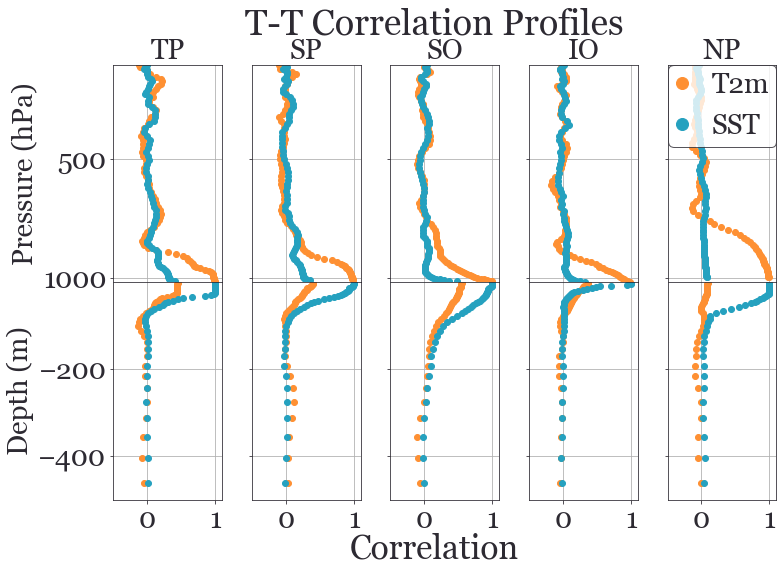

In [182]:
## Create subplots
fig, axs = plt.subplots(nrows=2, ncols=5, sharex=True, sharey='row') 

## T2m
# Plot atm correlations
axs[0, 0].plot(tp_corr['ast_atm_T'][ind100hPa:], tp_corr['atm_p'][ind100hPa:], 'o', color=deep_saffron, linewidth=5)
axs[0, 1].plot(sp_corr['ast_atm_T'][ind100hPa:], sp_corr['atm_p'][ind100hPa:], 'o', color=deep_saffron, linewidth=5)
axs[0, 2].plot(so_corr['ast_atm_T'][ind100hPa:], so_corr['atm_p'][ind100hPa:], 'o', color=deep_saffron, linewidth=5)
axs[0, 3].plot(io_corr['ast_atm_T'][ind100hPa:], io_corr['atm_p'][ind100hPa:], 'o', color=deep_saffron, linewidth=5)
axs[0, 4].plot(np_corr['ast_atm_T'][ind100hPa:], np_corr['atm_p'][ind100hPa:], 'o', color=deep_saffron, linewidth=5, label='T2m')

# Plot ocn correlations
axs[1, 0].plot(tp_corr['ast_ocn_T'][:ind500m_ocn+1], -1 * tp_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=deep_saffron, linewidth=5)
axs[1, 1].plot(sp_corr['ast_ocn_T'][:ind500m_ocn+1], -1 * sp_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=deep_saffron, linewidth=5)
axs[1, 2].plot(so_corr['ast_ocn_T'][:ind500m_ocn+1], -1 * so_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=deep_saffron, linewidth=5)
axs[1, 3].plot(io_corr['ast_ocn_T'][:ind500m_ocn+1], -1 * io_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=deep_saffron, linewidth=5)
axs[1, 4].plot(np_corr['ast_ocn_T'][:ind500m_ocn+1], -1 * np_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=deep_saffron, linewidth=5)
    
    
## SST
# Plot atm correlations
axs[0, 0].plot(tp_corr['sst_atm_T'][ind100hPa:], tp_corr['atm_p'][ind100hPa:], 'o', color=pacific_blue, linewidth=5)
axs[0, 1].plot(sp_corr['sst_atm_T'][ind100hPa:], sp_corr['atm_p'][ind100hPa:], 'o', color=pacific_blue, linewidth=5)
axs[0, 2].plot(so_corr['sst_atm_T'][ind100hPa:], so_corr['atm_p'][ind100hPa:], 'o', color=pacific_blue, linewidth=5)
axs[0, 3].plot(io_corr['sst_atm_T'][ind100hPa:], io_corr['atm_p'][ind100hPa:], 'o', color=pacific_blue, linewidth=5)
axs[0, 4].plot(np_corr['sst_atm_T'][ind100hPa:], np_corr['atm_p'][ind100hPa:], 'o', color=pacific_blue, linewidth=5, label='SST')

# Plot ocn correlations
axs[1, 0].plot(tp_corr['sst_ocn_T'][:ind500m_ocn+1], -1 * tp_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=pacific_blue, linewidth=5)
axs[1, 1].plot(sp_corr['sst_ocn_T'][:ind500m_ocn+1], -1 * sp_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=pacific_blue, linewidth=5)
axs[1, 2].plot(so_corr['sst_ocn_T'][:ind500m_ocn+1], -1 * so_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=pacific_blue, linewidth=5)
axs[1, 3].plot(io_corr['sst_ocn_T'][:ind500m_ocn+1], -1 * io_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=pacific_blue, linewidth=5)
axs[1, 4].plot(np_corr['sst_ocn_T'][:ind500m_ocn+1], -1 * np_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=pacific_blue, linewidth=5)

# Set titles
axs[0,0].set_title('TP', color=raisin_black, fontsize=28)
axs[0,1].set_title('SP', color=raisin_black, fontsize=28)
axs[0,2].set_title('SO', color=raisin_black, fontsize=28)
axs[0,3].set_title('IO', color=raisin_black, fontsize=28)
axs[0,4].set_title('NP', color=raisin_black, fontsize=28)

# Add correlation
#axs[1,0].set_xlabel('cross-corr = '+str('%.2f'%tp_corr['sst_atm_T'][indt2m].values))
#axs[1,1].set_xlabel('cross-corr = '+str('%.2f'%sp_corr['sst_atm_T'][indt2m].values))
#axs[1,2].set_xlabel('cross-corr = '+str('%.2f'%so_corr['sst_atm_T'][indt2m].values))
#axs[1,3].set_xlabel('cross-corr = '+str('%.2f'%io_corr['sst_atm_T'][indt2m].values))
#axs[1,4].set_xlabel('cross-corr = '+str('%.2f'%np_corr['sst_atm_T'][indt2m].values))

# Adjust and label axes
axs[0, 0].set_xlim([-0.5, 1.1])
axs[0, 0].set_ylim([100,1019])
axs[0, 0].invert_yaxis()
axs[1, 0].set_ylim([-500,-1])
axs[0, 0].set_ylabel('Pressure (hPa)', color=raisin_black)
axs[1, 0].set_ylabel('Depth (m)', color=raisin_black)
fig.supxlabel('Correlation', color=raisin_black)
fig.suptitle('T-T Correlation Profiles', color=raisin_black, fontsize=36)

# Legend
leg = axs[0,4].legend(labelcolor=raisin_black, loc='upper right', borderaxespad=0,  borderpad=0.25, handlelength=.5, markerscale=2)
leg.get_frame().set_edgecolor(raisin_black)

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(2)
    ax.spines['bottom'].set_color(raisin_black)
    ax.spines['top'].set_color(raisin_black) 
    ax.spines['right'].set_color(raisin_black)
    ax.spines['left'].set_color(raisin_black)
    ax.xaxis.label.set_color(raisin_black)
    ax.yaxis.label.set_color(raisin_black)
    ax.tick_params(colors=raisin_black, which='both') 


plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.sans-serif':'Georgia'})
plt.rcParams.update({'font.size':28})
plt.savefig(plot_dir+'/ast_sst_temp_corr_five_columns.pdf')
plt.show()

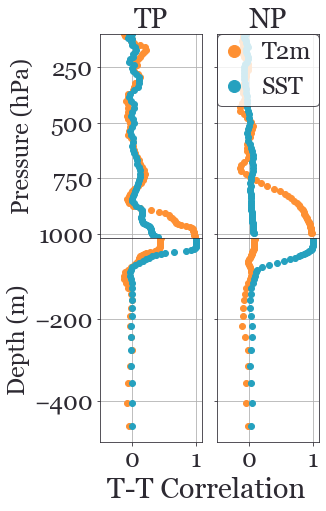

In [283]:
## Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey='row') 

## T2m
# Plot atm correlations
axs[0, 0].plot(tp_corr['ast_atm_T'][ind100hPa:], tp_corr['atm_p'][ind100hPa:], 'o', color=deep_saffron, linewidth=5)
axs[0, 1].plot(np_corr['ast_atm_T'][ind100hPa:], np_corr['atm_p'][ind100hPa:], 'o', color=deep_saffron, linewidth=5, label='T2m')

# Plot ocn correlations
axs[1, 0].plot(tp_corr['ast_ocn_T'][:ind500m_ocn+1], -1 * tp_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=deep_saffron, linewidth=5)
axs[1, 1].plot(np_corr['ast_ocn_T'][:ind500m_ocn+1], -1 * np_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=deep_saffron, linewidth=5)
    
    
## SST
# Plot atm correlations
axs[0, 0].plot(tp_corr['sst_atm_T'][ind100hPa:], tp_corr['atm_p'][ind100hPa:], 'o', color=pacific_blue, linewidth=5)
axs[0, 1].plot(np_corr['sst_atm_T'][ind100hPa:], np_corr['atm_p'][ind100hPa:], 'o', color=pacific_blue, linewidth=5, label='SST')

# Plot ocn correlations
axs[1, 0].plot(tp_corr['sst_ocn_T'][:ind500m_ocn+1], -1 * tp_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=pacific_blue, linewidth=5)
axs[1, 1].plot(np_corr['sst_ocn_T'][:ind500m_ocn+1], -1 * np_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=pacific_blue, linewidth=5)

# Set titles
axs[0,0].set_title('TP', color=raisin_black, fontsize=28)
axs[0,1].set_title('NP', color=raisin_black, fontsize=28)


# Adjust and label axes
axs[0, 0].set_xlim([-0.5, 1.1])
axs[0, 0].set_ylim([100,1019])
axs[0, 0].invert_yaxis()
axs[1, 0].set_ylim([-500,-1])
axs[0, 0].set_ylabel('Pressure (hPa)', color=raisin_black)
axs[1, 0].set_ylabel('Depth (m)', color=raisin_black)
fig.supxlabel('T-T Correlation', color=raisin_black)
#fig.suptitle('T-T Correlation', color=raisin_black, fontsize=32)

# Legend
leg = axs[0,1].legend(labelcolor=raisin_black, loc='upper right', borderaxespad=0,  borderpad=0.3, handlelength=.8, markerscale=2)
leg.get_frame().set_edgecolor(raisin_black)

# Adjust aesthetics
#plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(2)
    ax.spines['bottom'].set_color(raisin_black)
    ax.spines['top'].set_color(raisin_black) 
    ax.spines['right'].set_color(raisin_black)
    ax.spines['left'].set_color(raisin_black)
    ax.xaxis.label.set_color(raisin_black)
    ax.yaxis.label.set_color(raisin_black)
    ax.tick_params(colors=raisin_black, which='both') 

#plt.rcParams['figure.figsize'] = [4,7.5]
plt.rcParams.update({'font.sans-serif':'Georgia'})
plt.rcParams.update({'font.size':24})
plt.subplots_adjust(hspace=.0, wspace=0.1)
plt.savefig(plot_dir+'/ast_sst_temp_corr_two_columns.pdf', bbox_inches='tight')
plt.show()

### Plot Kalman gains

In [288]:
# Compute atm pressure from pressure thickness of each level
south_pacific['atm_p'] = south_pacific['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
southern_ocean['atm_p'] = southern_ocean['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
indian_ocean['atm_p'] = indian_ocean['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
tropical_pacific['atm_p'] = tropical_pacific['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
north_pacific['atm_p'] = north_pacific['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2

In [311]:
ocn_z = south_pacific['ocn_lev'].to_numpy()

In [289]:
## Get indices of relevant pressure levels in atm and depth levels in ocn
# atmosphere
num_atm_levs = len(south_pacific['atm_lev'])
ind_ast = num_atm_levs - 1
ind100hPa = np.argmin(np.abs(south_pacific['atm_p'].mean(['lat', 'lon']).values-100))
ind800hPa = np.argmin(np.abs(south_pacific['atm_p'].mean(['lat', 'lon']).values-800))
# ocean
ind0m = num_atm_levs
ind_sst = ind0m
ind150m_ocn = np.argmin(np.abs(south_pacific['ocn_lev'].values-150))
ind2km_ocn  = np.argmin(np.abs(south_pacific['ocn_lev'].values-2000))
num_ocn_levs = len(south_pacific['ocn_lev'])
# both
ind150m = ind0m + ind150m_ocn
ind2km = ind0m + ind2km_ocn
num_tot_levs = num_atm_levs + num_ocn_levs

In [290]:
# Load covariance matrices
sp_cov = np.load(my_data_dir +'/'+these_columns['save_name'][0]+'_cov.npy')
so_cov = np.load(my_data_dir +'/'+these_columns['save_name'][1]+'_cov.npy')
io_cov = np.load(my_data_dir +'/'+these_columns['save_name'][2]+'_cov.npy')
tp_cov = np.load(my_data_dir +'/'+these_columns['save_name'][3]+'_cov.npy')
np_cov = np.load(my_data_dir +'/'+these_columns['save_name'][4]+'_cov.npy')

In [291]:
def get_perfect_kalman_gain(this_cov, ind_state, ind_ob):
    ## Set observation operator
    num_levs = this_cov.shape[0]
    HofX = np.zeros((1, num_levs))
    HofX[0, ind_ob] = 1

    ## Set observation error variance equal to true variance
    R = HofX @ this_cov @ HofX.transpose()

    ## Get perfect kalman gain
    perfect_kg = ( this_cov @ HofX.transpose() /(HofX @ this_cov @ HofX.transpose() + R))
    perfect_kg = perfect_kg[ind_state, 0]
    
    return perfect_kg

In [292]:
## Set inputs for perfect kalman gain
ind_atm = np.arange(ind100hPa, num_atm_levs)
ind_ocn = np.arange(ind0m, ind2km)

In [293]:
## AST into ATM
sp_ast_atm_kg = get_perfect_kalman_gain(sp_cov, ind_atm, ind_ast)
so_ast_atm_kg = get_perfect_kalman_gain(so_cov, ind_atm, ind_ast)
io_ast_atm_kg = get_perfect_kalman_gain(io_cov, ind_atm, ind_ast)
tp_ast_atm_kg = get_perfect_kalman_gain(tp_cov, ind_atm, ind_ast)
np_ast_atm_kg = get_perfect_kalman_gain(np_cov, ind_atm, ind_ast)

## SST into ATM
sp_sst_atm_kg = get_perfect_kalman_gain(sp_cov, ind_atm, ind_sst)
so_sst_atm_kg = get_perfect_kalman_gain(so_cov, ind_atm, ind_sst)
io_sst_atm_kg = get_perfect_kalman_gain(io_cov, ind_atm, ind_sst)
tp_sst_atm_kg = get_perfect_kalman_gain(tp_cov, ind_atm, ind_sst)
np_sst_atm_kg = get_perfect_kalman_gain(np_cov, ind_atm, ind_sst)

## AST into OCN
sp_ast_ocn_kg = get_perfect_kalman_gain(sp_cov, ind_ocn, ind_ast)
so_ast_ocn_kg = get_perfect_kalman_gain(so_cov, ind_ocn, ind_ast)
io_ast_ocn_kg = get_perfect_kalman_gain(io_cov, ind_ocn, ind_ast)
tp_ast_ocn_kg = get_perfect_kalman_gain(tp_cov, ind_ocn, ind_ast)
np_ast_ocn_kg = get_perfect_kalman_gain(np_cov, ind_ocn, ind_ast)

## SST into OCN
sp_sst_ocn_kg = get_perfect_kalman_gain(sp_cov, ind_ocn, ind_sst)
so_sst_ocn_kg = get_perfect_kalman_gain(so_cov, ind_ocn, ind_sst)
io_sst_ocn_kg = get_perfect_kalman_gain(io_cov, ind_ocn, ind_sst)
tp_sst_ocn_kg = get_perfect_kalman_gain(tp_cov, ind_ocn, ind_sst)
np_sst_ocn_kg = get_perfect_kalman_gain(np_cov, ind_ocn, ind_sst)

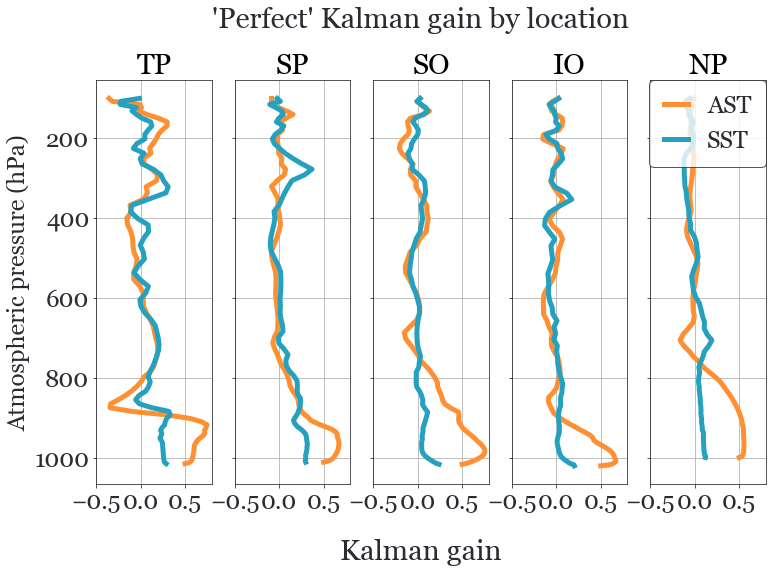

In [322]:
## Create subplots
fig, axs = plt.subplots(ncols=5, sharey=True, sharex=True) 

# Plot Kalman gain for AST into ATM
axs[0].plot(tp_ast_atm_kg, tropical_pacific['atm_p'].mean(['lat', 'lon']).to_numpy()[ind100hPa:], color=deep_saffron, linewidth=5)
axs[1].plot(sp_ast_atm_kg, south_pacific['atm_p'].mean(['lat', 'lon']).to_numpy()[ind100hPa:], color=deep_saffron, linewidth=5)
axs[2].plot(so_ast_atm_kg, southern_ocean['atm_p'].mean(['lat', 'lon']).to_numpy()[ind100hPa:], color=deep_saffron, linewidth=5)
axs[3].plot(io_ast_atm_kg, indian_ocean['atm_p'].mean(['lat', 'lon']).to_numpy()[ind100hPa:], color=deep_saffron, linewidth=5)
axs[4].plot(np_ast_atm_kg, north_pacific['atm_p'].mean(['lat', 'lon']).to_numpy()[ind100hPa:], color=deep_saffron, linewidth=5, label='AST')

# Plot Kalman gain for SST into ATM
axs[0].plot(tp_sst_atm_kg, tropical_pacific['atm_p'].mean(['lat', 'lon']).to_numpy()[ind100hPa:], color=pacific_blue, linewidth=5)
axs[1].plot(sp_sst_atm_kg, south_pacific['atm_p'].mean(['lat', 'lon']).to_numpy()[ind100hPa:], color=pacific_blue, linewidth=5)
axs[2].plot(so_sst_atm_kg, southern_ocean['atm_p'].mean(['lat', 'lon']).to_numpy()[ind100hPa:], color=pacific_blue, linewidth=5)
axs[3].plot(io_sst_atm_kg, indian_ocean['atm_p'].mean(['lat', 'lon']).to_numpy()[ind100hPa:], color=pacific_blue, linewidth=5)
axs[4].plot(np_sst_atm_kg, north_pacific['atm_p'].mean(['lat', 'lon']).to_numpy()[ind100hPa:], color=pacific_blue, linewidth=5, label='SST')

# Set titles
axs[0].set_title('TP')
axs[1].set_title('SP')
axs[2].set_title('SO')
axs[3].set_title('IO')
axs[4].set_title('NP')

# Legend
leg = axs[4].legend(labelcolor=raisin_black, loc='upper right', borderaxespad=0,  borderpad=0.6, handlelength=1)
leg.get_frame().set_edgecolor(raisin_black)

# Adjust and label axes
axs[0].set_xlim([-0.5, 0.8])
plt.gca().invert_yaxis()
axs[0].set_ylabel('Atmospheric pressure (hPa)', color=raisin_black)
fig.supxlabel('Kalman gain', color=raisin_black)
fig.suptitle('\'Perfect\' Kalman gain by location', color=raisin_black)

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(3.5)
    ax.spines['bottom'].set_color(raisin_black)
    ax.spines['top'].set_color(raisin_black) 
    ax.spines['right'].set_color(raisin_black)
    ax.spines['left'].set_color(raisin_black)
    ax.xaxis.label.set_color(raisin_black)
    ax.yaxis.label.set_color(raisin_black)
    ax.tick_params(colors=raisin_black, which='both') 
    
# Save and show
plt.rcParams['figure.figsize'] = [12,8]
plt.savefig(plot_dir+'/perfect_kalman_gain_five_columns_atm.pdf')
plt.show()

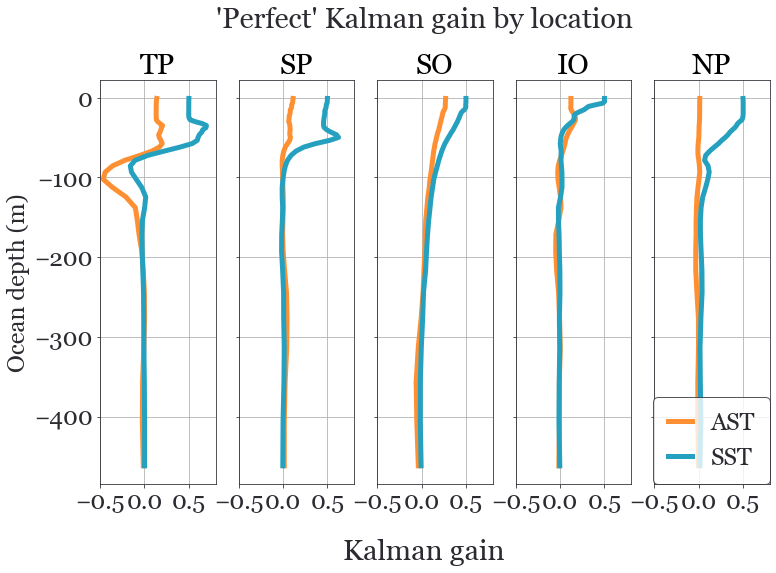

In [323]:
## Create subplots
fig, axs = plt.subplots(ncols=5, sharey=True, sharex=True) 

# Plot Kalman gain for AST into ATM
axs[0].plot(tp_ast_ocn_kg[:ind500m_ocn], -1*ocn_z[:ind500m_ocn], color=deep_saffron, linewidth=5)
axs[1].plot(sp_ast_ocn_kg[:ind500m_ocn], -1*ocn_z[:ind500m_ocn], color=deep_saffron, linewidth=5)
axs[2].plot(so_ast_ocn_kg[:ind500m_ocn], -1*ocn_z[:ind500m_ocn], color=deep_saffron, linewidth=5)
axs[3].plot(io_ast_ocn_kg[:ind500m_ocn], -1*ocn_z[:ind500m_ocn], color=deep_saffron, linewidth=5)
axs[4].plot(np_ast_ocn_kg[:ind500m_ocn], -1*ocn_z[:ind500m_ocn], color=deep_saffron, linewidth=5, label='AST')

# Plot Kalman gain for SST into ATM
axs[0].plot(tp_sst_ocn_kg[:ind500m_ocn], -1*ocn_z[:ind500m_ocn], color=pacific_blue, linewidth=5)
axs[1].plot(sp_sst_ocn_kg[:ind500m_ocn], -1*ocn_z[:ind500m_ocn], color=pacific_blue, linewidth=5)
axs[2].plot(so_sst_ocn_kg[:ind500m_ocn], -1*ocn_z[:ind500m_ocn], color=pacific_blue, linewidth=5)
axs[3].plot(io_sst_ocn_kg[:ind500m_ocn], -1*ocn_z[:ind500m_ocn], color=pacific_blue, linewidth=5)
axs[4].plot(np_sst_ocn_kg[:ind500m_ocn], -1*ocn_z[:ind500m_ocn], color=pacific_blue, linewidth=5, label='SST')

# Set titles
axs[0].set_title('TP')
axs[1].set_title('SP')
axs[2].set_title('SO')
axs[3].set_title('IO')
axs[4].set_title('NP')

# Legend
leg = axs[4].legend(labelcolor=raisin_black, loc='lower right', borderaxespad=0,  borderpad=0.6, handlelength=1)
leg.get_frame().set_edgecolor(raisin_black)

# Adjust and label axes
axs[0].set_xlim([-0.5, 0.8])
axs[0].set_ylabel('Ocean depth (m)', color=raisin_black)
fig.supxlabel('Kalman gain', color=raisin_black)
fig.suptitle('\'Perfect\' Kalman gain by location', color=raisin_black)

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(3.5)
    ax.spines['bottom'].set_color(raisin_black)
    ax.spines['top'].set_color(raisin_black) 
    ax.spines['right'].set_color(raisin_black)
    ax.spines['left'].set_color(raisin_black)
    ax.xaxis.label.set_color(raisin_black)
    ax.yaxis.label.set_color(raisin_black)
    ax.tick_params(colors=raisin_black, which='both') 
    
# Save and show
plt.rcParams['figure.figsize'] = [12,8]
plt.savefig(plot_dir+'/perfect_kalman_gain_five_columns_ocn.pdf')
plt.show()

### Compute optimal localization radius

In [452]:
# Define a range of localization radii for ocn and atm
loc_rads_ocn = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
loc_rads_atm = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]#[0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2]
loc_rads_crs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]
loc_rad_noloc = 1e5

In [330]:
def get_column_mean(ds):
    # initialize array
    num_atm_levs = len(ds['atm_lev'])
    num_ocn_levs = len(ds['ocn_lev'])
    num_tot_levs = num_atm_levs + num_ocn_levs
    ds_manual = np.empty(num_tot_levs)
    # Get mean of atm bootstrapped ensemble
    ds_atm = ds['atm_T'].mean(['lat', 'lon', 'ens_mem'])
    ds_atm = ds_atm.to_numpy()
    # Get mean of ocn bootstrapped ensemble
    ds_ocn = ds['ocn_Temp'].mean(['lat', 'lon', 'ens_mem'])
    ds_ocn = ds_ocn.to_numpy()
    # Store atm and ocn temperature mean
    ds_manual[:num_atm_levs] = ds_atm - 273.15
    ds_manual[num_atm_levs:num_tot_levs] = ds_ocn
    ds_manual = np.atleast_2d(ds_manual).transpose()
    return ds_manual

In [331]:
# Get mean temperature profiles
sp_avg = get_column_mean(south_pacific)
so_avg = get_column_mean(southern_ocean)
io_avg = get_column_mean(indian_ocean)
tp_avg = get_column_mean(tropical_pacific)
np_avg = get_column_mean(north_pacific)

In [325]:
def create_distance_matrix(spatial_locations):
    N = len(spatial_locations) 
    # Create distance matrix
    dis = np.zeros((N,N))
    for jj in range(N):
        for ii in range(N):
            d = np.abs(spatial_locations[ii]-spatial_locations[jj])
            dis[ii, jj] = d
    return dis

In [326]:
def compute_relative_error(ind_state, ind_ob, loc_rads_state, loc_rad_ob, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_size = 20, use_loc=True, ind_top_of_fluid=0):
    ## Set observation operator
    num_levs = this_cov.shape[0]
    HofX = np.zeros((1, num_levs))
    HofX[0, ind_ob] = 1
    
    ## Generate synthetic observations
    xt = this_avg + this_cov_sqrt @ np.random.normal(scale=1, size=(num_levs, 1)) 
    y_ob = HofX @ ( xt + this_cov_sqrt @ np.random.normal(scale=1, size=(num_levs, 1))) # obs error set to equal 'perfect' background error
    
    ## Generate ensemble
    rnd = np.random.normal(size=(num_levs, ens_size))
    x_err_ens = this_cov_sqrt @ rnd
    P_ens = np.cov(x_err_ens)
    x_ens = this_avg + x_err_ens

    ## Form background observation perturbations
    y_ens = HofX @ x_ens
    
    ## Set observation error variance equal to true variance
    R = HofX @ this_cov @ HofX.transpose()
    R_inv = np.reciprocal(R)
    
    ## Calculate background mean and innovation
    background_mean = np.mean(x_ens, 1)
    innovation = y_ob - HofX @ background_mean
    
    ## Compute perfect analysis
    perfect_kg = ( this_cov @ HofX.transpose() /(HofX @ this_cov @ HofX.transpose() + R))
    
    ## Precompute some terms for EnKF -- assumes point observation & single domain OR observation at the interface
    HPHT = HofX @ P_ens @ HofX.transpose()
    PHT = P_ens @ HofX.transpose()
    dist = np.abs(pos_state - pos_ob)
    
    ## Take only state
    x_ens = x_ens[ind_state]
    background_mean = background_mean[ind_state]
    perfect_kg = perfect_kg[ind_state, 0]
    pos_state = pos_state[(ind_state - ind_top_of_fluid)]
    PHT = PHT[ind_state,0]
    dist = dist[(ind_state-ind_top_of_fluid)]
    
    ## Get relative error for each localization radius
    num_loc_rads =  len(loc_rads_state)
    norm_rel_error_enkf = np.empty(num_loc_rads)
    norm_rel_error_letkf = np.empty(num_loc_rads)
    for loc_ind in range(num_loc_rads):
        # Get localization radius
        localization_radius = loc_rads_state[loc_ind]
        # EnKF update
        if use_loc:
            loc = gaspari_cohn(dist/(localization_radius/2))
            CHT = loc * PHT # Localize ensemble covariance (inefficient, but OK for a small system)
        else:
            CHT = PHT
        enkf_kg = (( CHT )/( HPHT[0,0] + R[0,0] )).squeeze() # Bad! But OK for single ob (scalar R)
        # LETKF update
        loc_rad_state = np.full_like(pos_state, localization_radius)
        analysis_mean_letkf = letkf(x_ens, y_ens, R_inv, y_ob, pos_state, pos_ob, loc_rad_state, loc_rad_ob, inflate=1, use_loc=use_loc)[0]
        letkf_kg = (analysis_mean_letkf - background_mean)/innovation
        # Compute relative error
        kg_err_enkf = perfect_kg - enkf_kg
        kg_err_letkf = perfect_kg - letkf_kg
        # Store relative error
        norm_rel_error_enkf[loc_ind] = np.sqrt(np.sum(np.square(kg_err_enkf))) / np.sqrt(np.sum(np.square(perfect_kg)))
        norm_rel_error_letkf[loc_ind] = np.sqrt(np.sum(np.square(kg_err_letkf))) / np.sqrt(np.sum(np.square(perfect_kg)))
    
    return norm_rel_error_enkf, norm_rel_error_letkf

In [327]:
def run_multiple_trials_rel_err(ind_state, ind_ob, loc_rads_state, loc_rad_ob, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_size = 20, num_trials=100, use_loc=True, ind_top_of_fluid=0):
    norm_rel_errors_enkf = np.empty((len(loc_rads_state), num_trials))
    norm_rel_errors_letkf = np.empty((len(loc_rads_state), num_trials))
    for trial in range(num_trials):
        norm_rerr_enkf, norm_rerr_letkf = compute_relative_error(ind_state=ind_state, ind_ob=ind_ob, loc_rads_state=loc_rads_state, loc_rad_ob=loc_rad_ob, this_avg=this_avg, this_cov=this_cov, this_cov_sqrt=this_cov_sqrt, pos_state=pos_state, pos_ob=pos_ob, ens_size=ens_size, use_loc=use_loc, ind_top_of_fluid=ind_top_of_fluid)
        norm_rel_errors_enkf[:, trial] = norm_rerr_enkf
        norm_rel_errors_letkf[:, trial] = norm_rerr_letkf
    return norm_rel_errors_enkf, norm_rel_errors_letkf

In [442]:
# AST into ATM (with localization)

# Tropical Pacific
ds = tropical_pacific
this_avg = tp_avg
this_cov = tp_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
err_ast_atm_enkf_tp, err_ast_atm_letkf_tp = run_multiple_trials_rel_err(ind_atm, ind_ast, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=0)

# South Pacific
ds = south_pacific
this_avg = sp_avg
this_cov = sp_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
err_ast_atm_enkf_sp, err_ast_atm_letkf_sp = run_multiple_trials_rel_err(ind_atm, ind_ast, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=0)

# Southern Ocean
ds = southern_ocean
this_avg = so_avg
this_cov = so_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
err_ast_atm_enkf_so, err_ast_atm_letkf_so = run_multiple_trials_rel_err(ind_atm, ind_ast, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=0)

# Indian Ocean
ds = indian_ocean
this_avg = io_avg
this_cov = io_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
err_ast_atm_enkf_io, err_ast_atm_letkf_io = run_multiple_trials_rel_err(ind_atm, ind_ast, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=0)

# North Pacific
ds = north_pacific
this_avg = np_avg
this_cov = np_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
err_ast_atm_enkf_np, err_ast_atm_letkf_np = run_multiple_trials_rel_err(ind_atm, ind_ast, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=0)

/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:44: RuntimeWarning: invalid value encountered in reciprocal
  gc[less2] = 1/12*dist[less2]**5 - .5*dist[less2]**4 + 0.625*dist[less2]**3 + 5/3*dist[less2]**2 - 5*dist[less2] + 4 - 2/3*dist[less2]**-1 ;
/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:120: RuntimeWarning: invalid value encountered in reciprocal
  evals_inv = np.reciprocal(evals)
/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:44: RuntimeWarning: invalid value encountered in reciprocal
  gc[less2] = 1/12*dist[less2]**5 - .5*dist[less2]**4 + 0.625*dist[less2]**3 + 5/3*dist[less2]**2 - 5*dist[less2] + 4 - 2/3*dist[less2]**-1 ;
/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:120: RuntimeWarning: invalid value encountered in reciprocal
  evals_inv = np.reciprocal(evals)
/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:44: RuntimeWarning: invalid value encountered in recip

In [443]:
# SST into ATM (with localization)

# Tropical Pacific
ds = tropical_pacific
this_avg = tp_avg
this_cov = tp_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
err_sst_atm_enkf_tp, err_sst_atm_letkf_tp = run_multiple_trials_rel_err(ind_atm, ind_sst, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=0)

# South Pacific
ds = south_pacific
this_avg = sp_avg
this_cov = sp_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
err_sst_atm_enkf_sp, err_sst_atm_letkf_sp = run_multiple_trials_rel_err(ind_atm, ind_sst, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=0)

# Southern Ocean
ds = southern_ocean
this_avg = so_avg
this_cov = so_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
err_sst_atm_enkf_so, err_sst_atm_letkf_so = run_multiple_trials_rel_err(ind_atm, ind_sst, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=0)

# Indian Ocean
ds = indian_ocean
this_avg = io_avg
this_cov = io_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
err_sst_atm_enkf_io, err_sst_atm_letkf_io = run_multiple_trials_rel_err(ind_atm, ind_sst, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=0)

# North Pacific
ds = north_pacific
this_avg = np_avg
this_cov = np_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
err_sst_atm_enkf_np, err_sst_atm_letkf_np = run_multiple_trials_rel_err(ind_atm, ind_sst, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=0)

/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:44: RuntimeWarning: invalid value encountered in reciprocal
  gc[less2] = 1/12*dist[less2]**5 - .5*dist[less2]**4 + 0.625*dist[less2]**3 + 5/3*dist[less2]**2 - 5*dist[less2] + 4 - 2/3*dist[less2]**-1 ;
/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:120: RuntimeWarning: invalid value encountered in reciprocal
  evals_inv = np.reciprocal(evals)
/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:44: RuntimeWarning: invalid value encountered in reciprocal
  gc[less2] = 1/12*dist[less2]**5 - .5*dist[less2]**4 + 0.625*dist[less2]**3 + 5/3*dist[less2]**2 - 5*dist[less2] + 4 - 2/3*dist[less2]**-1 ;
/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:120: RuntimeWarning: invalid value encountered in reciprocal
  evals_inv = np.reciprocal(evals)
/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:120: RuntimeWarning: invalid value encountered in reci

In [455]:
# AST into OCN (with localization)

ocn_z = ds['ocn_lev'].to_numpy()
pos_state = ocn_z - ocn_z[0]
pos_ob = pos_state[0]

# Tropical Pacific
ds = tropical_pacific
this_avg = tp_avg
this_cov = tp_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
err_ast_ocn_enkf_tp, err_ast_ocn_letkf_tp = run_multiple_trials_rel_err(ind_ocn, ind_ast, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=ind0m)

# South Pacific
ds = south_pacific
this_avg = sp_avg
this_cov = sp_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
err_ast_ocn_enkf_sp, err_ast_ocn_letkf_sp = run_multiple_trials_rel_err(ind_ocn, ind_ast, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=ind0m)

# Southern Ocean
ds = southern_ocean
this_avg = so_avg
this_cov = so_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
err_ast_ocn_enkf_so, err_ast_ocn_letkf_so = run_multiple_trials_rel_err(ind_ocn, ind_ast, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=ind0m)

# Indian Ocean
ds = indian_ocean
this_avg = io_avg
this_cov = io_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
err_ast_ocn_enkf_io, err_ast_ocn_letkf_io = run_multiple_trials_rel_err(ind_ocn, ind_ast, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=ind0m)

# North Pacific
ds = north_pacific
this_avg = np_avg
this_cov = np_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
err_ast_ocn_enkf_np, err_ast_ocn_letkf_np = run_multiple_trials_rel_err(ind_ocn, ind_ast, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=ind0m)

In [456]:
# SST into OCN (with localization)

ocn_z = ds['ocn_lev'].to_numpy()
pos_state = ocn_z - ocn_z[0]
pos_ob = pos_state[0]

# Tropical Pacific
ds = tropical_pacific
this_avg = tp_avg
this_cov = tp_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
err_sst_ocn_enkf_tp, err_sst_ocn_letkf_tp = run_multiple_trials_rel_err(ind_ocn, ind_sst, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=ind0m)

# South Pacific
ds = south_pacific
this_avg = sp_avg
this_cov = sp_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
err_sst_ocn_enkf_sp, err_sst_ocn_letkf_sp = run_multiple_trials_rel_err(ind_ocn, ind_sst, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=ind0m)

# Southern Ocean
ds = southern_ocean
this_avg = so_avg
this_cov = so_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
err_sst_ocn_enkf_so, err_sst_ocn_letkf_so = run_multiple_trials_rel_err(ind_ocn, ind_sst, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=ind0m)

# Indian Ocean
ds = indian_ocean
this_avg = io_avg
this_cov = io_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
err_sst_ocn_enkf_io, err_sst_ocn_letkf_io = run_multiple_trials_rel_err(ind_ocn, ind_sst, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=ind0m)

# North Pacific
ds = north_pacific
this_avg = np_avg
this_cov = np_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
err_sst_ocn_enkf_np, err_sst_ocn_letkf_np = run_multiple_trials_rel_err(ind_ocn, ind_sst, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, num_trials=500, use_loc=True, ind_top_of_fluid=ind0m)

In [444]:
# Processing AST into ATM Errors

# Tropical Pacific
err_ast_atm_enkf_tp_avg = np.mean(err_ast_atm_enkf_tp, axis=1)
err_ast_atm_letkf_tp_avg = np.mean(err_ast_atm_letkf_tp, axis=1)

# South Pacific
err_ast_atm_enkf_sp_avg = np.mean(err_ast_atm_enkf_sp, axis=1)
err_ast_atm_letkf_sp_avg = np.mean(err_ast_atm_letkf_sp, axis=1)

# Southern Ocean
err_ast_atm_enkf_so_avg = np.mean(err_ast_atm_enkf_so, axis=1)
err_ast_atm_letkf_so_avg = np.mean(err_ast_atm_letkf_so, axis=1)

# Indian Ocean
err_ast_atm_enkf_io_avg = np.mean(err_ast_atm_enkf_io, axis=1)
err_ast_atm_letkf_io_avg = np.mean(err_ast_atm_letkf_io, axis=1)

# North Pacific
err_ast_atm_enkf_np_avg = np.mean(err_ast_atm_enkf_np, axis=1)
err_ast_atm_letkf_np_avg = np.mean(err_ast_atm_letkf_np, axis=1)

In [445]:
# Processing SST into ATM Errors

# Tropical Pacific
err_sst_atm_enkf_tp_avg = np.mean(err_sst_atm_enkf_tp, axis=1)
err_sst_atm_letkf_tp_avg = np.mean(err_sst_atm_letkf_tp, axis=1)

# South Pacific
err_sst_atm_enkf_sp_avg = np.mean(err_sst_atm_enkf_sp, axis=1)
err_sst_atm_letkf_sp_avg = np.mean(err_sst_atm_letkf_sp, axis=1)

# Southern Ocean
err_sst_atm_enkf_so_avg = np.mean(err_sst_atm_enkf_so, axis=1)
err_sst_atm_letkf_so_avg = np.mean(err_sst_atm_letkf_so, axis=1)

# Indian Ocean
err_sst_atm_enkf_io_avg = np.mean(err_sst_atm_enkf_io, axis=1)
err_sst_atm_letkf_io_avg = np.mean(err_sst_atm_letkf_io, axis=1)

# North Pacific
err_sst_atm_enkf_np_avg = np.mean(err_sst_atm_enkf_np, axis=1)
err_sst_atm_letkf_np_avg = np.mean(err_sst_atm_letkf_np, axis=1)

In [457]:
# Processing AST into OCN Errors

# Tropical Pacific
err_ast_ocn_enkf_tp_avg = np.mean(err_ast_ocn_enkf_tp, axis=1)
err_ast_ocn_letkf_tp_avg = np.mean(err_ast_ocn_letkf_tp, axis=1)

# South Pacific
err_ast_ocn_enkf_sp_avg = np.mean(err_ast_ocn_enkf_sp, axis=1)
err_ast_ocn_letkf_sp_avg = np.mean(err_ast_ocn_letkf_sp, axis=1)

# Southern Ocean
err_ast_ocn_enkf_so_avg = np.mean(err_ast_ocn_enkf_so, axis=1)
err_ast_ocn_letkf_so_avg = np.mean(err_ast_ocn_letkf_so, axis=1)

# Indian Ocean
err_ast_ocn_enkf_io_avg = np.mean(err_ast_ocn_enkf_io, axis=1)
err_ast_ocn_letkf_io_avg = np.mean(err_ast_ocn_letkf_io, axis=1)

# North Pacific
err_ast_ocn_enkf_np_avg = np.mean(err_ast_ocn_enkf_np, axis=1)
err_ast_ocn_letkf_np_avg = np.mean(err_ast_ocn_letkf_np, axis=1)

In [458]:
# Processing SST into OCN Errors

# Tropical Pacific
err_sst_ocn_enkf_tp_avg = np.mean(err_sst_ocn_enkf_tp, axis=1)
err_sst_ocn_letkf_tp_avg = np.mean(err_sst_ocn_letkf_tp, axis=1)

# South Pacific
err_sst_ocn_enkf_sp_avg = np.mean(err_sst_ocn_enkf_sp, axis=1)
err_sst_ocn_letkf_sp_avg = np.mean(err_sst_ocn_letkf_sp, axis=1)

# Southern Ocean
err_sst_ocn_enkf_so_avg = np.mean(err_sst_ocn_enkf_so, axis=1)
err_sst_ocn_letkf_so_avg = np.mean(err_sst_ocn_letkf_so, axis=1)

# Indian Ocean
err_sst_ocn_enkf_io_avg = np.mean(err_sst_ocn_enkf_io, axis=1)
err_sst_ocn_letkf_io_avg = np.mean(err_sst_ocn_letkf_io, axis=1)

# North Pacific
err_sst_ocn_enkf_np_avg = np.mean(err_sst_ocn_enkf_np, axis=1)
err_sst_ocn_letkf_np_avg = np.mean(err_sst_ocn_letkf_np, axis=1)

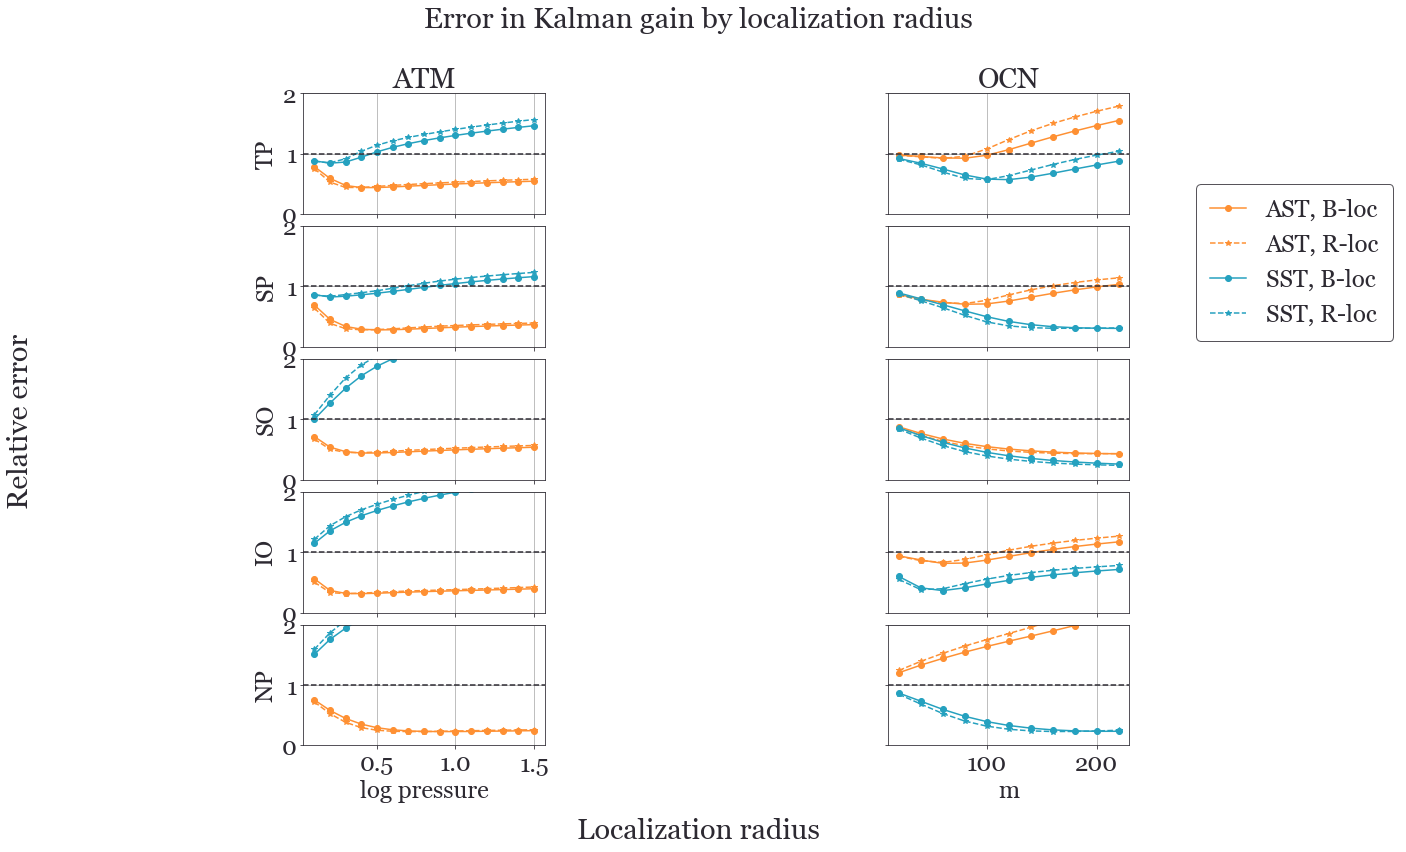

In [644]:
## Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, sharey=True, sharex='col') 

# AST into ATM
axs[0,0].plot(loc_rads_atm, err_ast_atm_enkf_tp_avg, '-o', color=deep_saffron, label='AST, B-loc')
axs[0,0].plot(loc_rads_atm, err_ast_atm_letkf_tp_avg, '--*', color=deep_saffron, label='AST, R-loc')
axs[1,0].plot(loc_rads_atm, err_ast_atm_enkf_sp_avg, '-o', color=deep_saffron)
axs[1,0].plot(loc_rads_atm, err_ast_atm_letkf_sp_avg, '--*', color=deep_saffron)
axs[2,0].plot(loc_rads_atm, err_ast_atm_enkf_so_avg, '-o', color=deep_saffron)
axs[2,0].plot(loc_rads_atm, err_ast_atm_letkf_so_avg, '--*', color=deep_saffron)
axs[3,0].plot(loc_rads_atm, err_ast_atm_enkf_io_avg, '-o', color=deep_saffron)
axs[3,0].plot(loc_rads_atm, err_ast_atm_letkf_io_avg, '--*', color=deep_saffron)
axs[4,0].plot(loc_rads_atm, err_ast_atm_enkf_np_avg, '-o', color=deep_saffron)
axs[4,0].plot(loc_rads_atm, err_ast_atm_letkf_np_avg, '--*', color=deep_saffron)

# SST into ATM
axs[0,0].plot(loc_rads_atm, err_sst_atm_enkf_tp_avg, '-o', color=pacific_blue, label='SST, B-loc')
axs[0,0].plot(loc_rads_atm, err_sst_atm_letkf_tp_avg, '--*', color=pacific_blue, label='SST, R-loc')
axs[1,0].plot(loc_rads_atm, err_sst_atm_enkf_sp_avg, '-o', color=pacific_blue)
axs[1,0].plot(loc_rads_atm, err_sst_atm_letkf_sp_avg, '--*', color=pacific_blue)
axs[2,0].plot(loc_rads_atm, err_sst_atm_enkf_so_avg, '-o', color=pacific_blue)
axs[2,0].plot(loc_rads_atm, err_sst_atm_letkf_so_avg, '--*', color=pacific_blue)
axs[3,0].plot(loc_rads_atm, err_sst_atm_enkf_io_avg, '-o', color=pacific_blue)
axs[3,0].plot(loc_rads_atm, err_sst_atm_letkf_io_avg, '--*', color=pacific_blue)
axs[4,0].plot(loc_rads_atm, err_sst_atm_enkf_np_avg, '-o', color=pacific_blue)
axs[4,0].plot(loc_rads_atm, err_sst_atm_letkf_np_avg, '--*', color=pacific_blue)

# AST into OCN
axs[0,1].plot(loc_rads_ocn, err_ast_ocn_enkf_tp_avg, '-o', color=deep_saffron)
axs[0,1].plot(loc_rads_ocn, err_ast_ocn_letkf_tp_avg, '--*', color=deep_saffron)
axs[1,1].plot(loc_rads_ocn, err_ast_ocn_enkf_sp_avg, '-o', color=deep_saffron)
axs[1,1].plot(loc_rads_ocn, err_ast_ocn_letkf_sp_avg, '--*', color=deep_saffron)
axs[2,1].plot(loc_rads_ocn, err_ast_ocn_enkf_so_avg, '-o', color=deep_saffron)
axs[2,1].plot(loc_rads_ocn, err_ast_ocn_letkf_so_avg, '--*', color=deep_saffron)
axs[3,1].plot(loc_rads_ocn, err_ast_ocn_enkf_io_avg, '-o', color=deep_saffron)
axs[3,1].plot(loc_rads_ocn, err_ast_ocn_letkf_io_avg, '--*', color=deep_saffron)
axs[4,1].plot(loc_rads_ocn, err_ast_ocn_enkf_np_avg, '-o', color=deep_saffron)
axs[4,1].plot(loc_rads_ocn, err_ast_ocn_letkf_np_avg, '--*', color=deep_saffron)

# SST into OCN
axs[0,1].plot(loc_rads_ocn, err_sst_ocn_enkf_tp_avg, '-o', color=pacific_blue)
axs[0,1].plot(loc_rads_ocn, err_sst_ocn_letkf_tp_avg, '--*', color=pacific_blue)
axs[1,1].plot(loc_rads_ocn, err_sst_ocn_enkf_sp_avg, '-o', color=pacific_blue)
axs[1,1].plot(loc_rads_ocn, err_sst_ocn_letkf_sp_avg, '--*', color=pacific_blue)
axs[2,1].plot(loc_rads_ocn, err_sst_ocn_enkf_so_avg, '-o', color=pacific_blue)
axs[2,1].plot(loc_rads_ocn, err_sst_ocn_letkf_so_avg, '--*', color=pacific_blue)
axs[3,1].plot(loc_rads_ocn, err_sst_ocn_enkf_io_avg, '-o', color=pacific_blue)
axs[3,1].plot(loc_rads_ocn, err_sst_ocn_letkf_io_avg, '--*', color=pacific_blue)
axs[4,1].plot(loc_rads_ocn, err_sst_ocn_enkf_np_avg, '-o', color=pacific_blue)
axs[4,1].plot(loc_rads_ocn, err_sst_ocn_letkf_np_avg, '--*', color=pacific_blue)

# Line at 1 for relative error
axs[0,0].axhline(y=1, color=raisin_black, linestyle='--')
axs[1,0].axhline(y=1, color=raisin_black, linestyle='--')
axs[2,0].axhline(y=1, color=raisin_black, linestyle='--')
axs[3,0].axhline(y=1, color=raisin_black, linestyle='--')
axs[4,0].axhline(y=1, color=raisin_black, linestyle='--')
axs[0,1].axhline(y=1, color=raisin_black, linestyle='--')
axs[1,1].axhline(y=1, color=raisin_black, linestyle='--')
axs[2,1].axhline(y=1, color=raisin_black, linestyle='--')
axs[3,1].axhline(y=1, color=raisin_black, linestyle='--')
axs[4,1].axhline(y=1, color=raisin_black, linestyle='--')

# Legend
leg = fig.legend(labelcolor=raisin_black, loc=(.85,.6), borderaxespad=.1,  borderpad=0.6, handlelength=1.5)
leg.get_frame().set_edgecolor(raisin_black)

# Label each subplot
axs[0,0].set_ylabel('TP', color=raisin_black)
axs[1,0].set_ylabel('SP', color=raisin_black)
axs[2,0].set_ylabel('SO', color=raisin_black)
axs[3,0].set_ylabel('IO', color=raisin_black)
axs[4,0].set_ylabel('NP', color=raisin_black)

# Adjust and label axes
axs[0,0].set_ylim([0,2])
fig.suptitle('Error in Kalman gain by localization radius', color=raisin_black)
axs[0,0].set_title('ATM', color=raisin_black)
axs[0,1].set_title('OCN', color=raisin_black)
fig.supylabel('Relative error', color=raisin_black)
axs[4,0].set_xlabel('log pressure', color=raisin_black)
axs[4,1].set_xlabel('m', color=raisin_black)
fig.supxlabel('Localization radius', color=raisin_black)

# Adjust aesthetics
plt.rcParams['figure.figsize'] = [20,12]
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(1/2)
    ax.spines['bottom'].set_color(raisin_black)
    ax.spines['top'].set_color(raisin_black) 
    ax.spines['right'].set_color(raisin_black)
    ax.spines['left'].set_color(raisin_black)
    ax.xaxis.label.set_color(raisin_black)
    ax.yaxis.label.set_color(raisin_black)
    ax.tick_params(colors=raisin_black, which='both') 
plt.subplots_adjust(wspace=.1, hspace=.1)
#plt.tight_layout()

# Save and show
plt.savefig(plot_dir+'/relative_error_by_loc_rad.pdf', bbox_inches='tight')
plt.show()

### Now look at when to assimilate by ensemble size

In [488]:
def run_multiple_trials_norm_err(ind_state, ind_ob, loc_rads_state, loc_rad_ob, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=0):
    norm_rel_errors_enkf = np.empty((len(ens_sizes), len(loc_rads_state), num_trials))
    norm_rel_errors_letkf = np.empty((len(ens_sizes), len(loc_rads_state), num_trials))
    for ens_ind in range(len(ens_sizes)):
        ens_size = ens_sizes[ens_ind]
        for trial in range(num_trials):
            norm_rerr_enkf, norm_rerr_letkf = compute_relative_error(ind_state=ind_state, ind_ob=ind_ob, loc_rads_state=loc_rads_state, loc_rad_ob=loc_rad_ob, this_avg=this_avg, this_cov=this_cov, this_cov_sqrt=this_cov_sqrt, pos_state=pos_state, pos_ob=pos_ob, ens_size=ens_size, use_loc=use_loc, ind_top_of_fluid=ind_top_of_fluid)
            norm_rel_errors_enkf[ens_ind, :, trial] = norm_rerr_enkf
            norm_rel_errors_letkf[ens_ind, :, trial] = norm_rerr_letkf
    return norm_rel_errors_enkf, norm_rel_errors_letkf

In [492]:
ens_sizes = [2, 4, 8, 16, 32, 64, 128]

In [497]:
# AST into ATM (with localization)

# Tropical Pacific
ds = tropical_pacific
this_avg = tp_avg
this_cov = tp_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
ens_err_ast_atm_enkf_tp, ens_err_ast_atm_letkf_tp = run_multiple_trials_norm_err(ind_atm, ind_ast, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=0)

# South Pacific
ds = south_pacific
this_avg = sp_avg
this_cov = sp_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
ens_err_ast_atm_enkf_sp, ens_err_ast_atm_letkf_sp = run_multiple_trials_norm_err(ind_atm, ind_ast, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=0)

# Southern Ocean
ds = southern_ocean
this_avg = so_avg
this_cov = so_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
ens_err_ast_atm_enkf_so, ens_err_ast_atm_letkf_so = run_multiple_trials_norm_err(ind_atm, ind_ast, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=0)

# Indian Ocean
ds = indian_ocean
this_avg = io_avg
this_cov = io_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
ens_err_ast_atm_enkf_io, ens_err_ast_atm_letkf_io = run_multiple_trials_norm_err(ind_atm, ind_ast, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=0)

# North Pacific
ds = north_pacific
this_avg = np_avg
this_cov = np_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
ens_err_ast_atm_enkf_np, ens_err_ast_atm_letkf_np = run_multiple_trials_norm_err(ind_atm, ind_ast, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=0)

/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:120: RuntimeWarning: invalid value encountered in reciprocal
  evals_inv = np.reciprocal(evals)
/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:120: RuntimeWarning: invalid value encountered in reciprocal
  evals_inv = np.reciprocal(evals)
/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:120: RuntimeWarning: invalid value encountered in reciprocal
  evals_inv = np.reciprocal(evals)
/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:120: RuntimeWarning: invalid value encountered in reciprocal
  evals_inv = np.reciprocal(evals)
/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:120: RuntimeWarning: invalid value encountered in reciprocal
  evals_inv = np.reciprocal(evals)


In [493]:
# SST into ATM (with localization)

# Tropical Pacific
ds = tropical_pacific
this_avg = tp_avg
this_cov = tp_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
ens_err_sst_atm_enkf_tp, ens_err_sst_atm_letkf_tp = run_multiple_trials_norm_err(ind_atm, ind_sst, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=0)

# South Pacific
ds = south_pacific
this_avg = sp_avg
this_cov = sp_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
ens_err_sst_atm_enkf_sp, ens_err_sst_atm_letkf_sp = run_multiple_trials_norm_err(ind_atm, ind_sst, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=0)

# Southern Ocean
ds = southern_ocean
this_avg = so_avg
this_cov = so_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
ens_err_sst_atm_enkf_so, ens_err_sst_atm_letkf_so = run_multiple_trials_norm_err(ind_atm, ind_sst, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=0)

# Indian Ocean
ds = indian_ocean
this_avg = io_avg
this_cov = io_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
ens_err_sst_atm_enkf_io, ens_err_sst_atm_letkf_io = run_multiple_trials_norm_err(ind_atm, ind_sst, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=0)

# North Pacific
ds = north_pacific
this_avg = np_avg
this_cov = np_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
atm_p = ds['atm_p'].mean(['lat', 'lon']).to_numpy()
pos_state = np.abs(np.log(atm_p) - np.log(atm_p[-1]))
pos_ob = pos_state[-1]
ens_err_sst_atm_enkf_np, ens_err_sst_atm_letkf_np = run_multiple_trials_norm_err(ind_atm, ind_sst, loc_rads_atm, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=0)

/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:120: RuntimeWarning: invalid value encountered in reciprocal
  evals_inv = np.reciprocal(evals)
/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:120: RuntimeWarning: invalid value encountered in reciprocal
  evals_inv = np.reciprocal(evals)
/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:120: RuntimeWarning: invalid value encountered in reciprocal
  evals_inv = np.reciprocal(evals)
/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:120: RuntimeWarning: invalid value encountered in reciprocal
  evals_inv = np.reciprocal(evals)
/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:120: RuntimeWarning: invalid value encountered in reciprocal
  evals_inv = np.reciprocal(evals)


In [494]:
# AST into OCN (with localization)

ocn_z = ds['ocn_lev'].to_numpy()
pos_state = ocn_z - ocn_z[0]
pos_ob = pos_state[0]

# Tropical Pacific
ds = tropical_pacific
this_avg = tp_avg
this_cov = tp_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
ens_err_ast_ocn_enkf_tp, ens_err_ast_ocn_letkf_tp = run_multiple_trials_norm_err(ind_ocn, ind_ast, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=ind0m)

# South Pacific
ds = south_pacific
this_avg = sp_avg
this_cov = sp_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
ens_err_ast_ocn_enkf_sp, ens_err_ast_ocn_letkf_sp = run_multiple_trials_norm_err(ind_ocn, ind_ast, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=ind0m)

# Southern Ocean
ds = southern_ocean
this_avg = so_avg
this_cov = so_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
ens_err_ast_ocn_enkf_so, ens_err_ast_ocn_letkf_so = run_multiple_trials_norm_err(ind_ocn, ind_ast, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=ind0m)

# Indian Ocean
ds = indian_ocean
this_avg = io_avg
this_cov = io_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
ens_err_ast_ocn_enkf_io, ens_err_ast_ocn_letkf_io = run_multiple_trials_norm_err(ind_ocn, ind_ast, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=ind0m)

# North Pacific
ds = north_pacific
this_avg = np_avg
this_cov = np_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
ens_err_ast_ocn_enkf_np, ens_err_ast_ocn_letkf_np = run_multiple_trials_norm_err(ind_ocn, ind_ast, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=ind0m)

/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts/letkf.py:44: RuntimeWarning: invalid value encountered in reciprocal
  gc[less2] = 1/12*dist[less2]**5 - .5*dist[less2]**4 + 0.625*dist[less2]**3 + 5/3*dist[less2]**2 - 5*dist[less2] + 4 - 2/3*dist[less2]**-1 ;


In [495]:
# SST into OCN (with localization)

ocn_z = ds['ocn_lev'].to_numpy()
pos_state = ocn_z - ocn_z[0]
pos_ob = pos_state[0]

# Tropical Pacific
ds = tropical_pacific
this_avg = tp_avg
this_cov = tp_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
ens_err_sst_ocn_enkf_tp, ens_err_sst_ocn_letkf_tp = run_multiple_trials_norm_err(ind_ocn, ind_sst, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=ind0m)

# South Pacific
ds = south_pacific
this_avg = sp_avg
this_cov = sp_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
ens_err_sst_ocn_enkf_sp, ens_err_sst_ocn_letkf_sp = run_multiple_trials_norm_err(ind_ocn, ind_sst, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=ind0m)

# Southern Ocean
ds = southern_ocean
this_avg = so_avg
this_cov = so_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
ens_err_sst_ocn_enkf_so, ens_err_sst_ocn_letkf_so = run_multiple_trials_norm_err(ind_ocn, ind_sst, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=ind0m)

# Indian Ocean
ds = indian_ocean
this_avg = io_avg
this_cov = io_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
ens_err_sst_ocn_enkf_io, ens_err_sst_ocn_letkf_io = run_multiple_trials_norm_err(ind_ocn, ind_sst, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=ind0m)

# North Pacific
ds = north_pacific
this_avg = np_avg
this_cov = np_cov
#
this_cov_sqrt = np.linalg.cholesky(this_cov)
ens_err_sst_ocn_enkf_np, ens_err_sst_ocn_letkf_np = run_multiple_trials_norm_err(ind_ocn, ind_sst, loc_rads_ocn, loc_rad_noloc, this_avg, this_cov, this_cov_sqrt, pos_state, pos_ob, ens_sizes, num_trials=100, use_loc=True, ind_top_of_fluid=ind0m)

In [513]:
## Process data

# Tropical Pacific
ast_atm_tp = np.min(np.median(ens_err_ast_atm_letkf_tp, axis=2), axis=1)
sst_atm_tp = np.min(np.median(ens_err_sst_atm_letkf_tp, axis=2), axis=1)
ast_ocn_tp = np.min(np.median(ens_err_ast_ocn_letkf_tp, axis=2), axis=1)
sst_ocn_tp = np.min(np.median(ens_err_sst_ocn_letkf_tp, axis=2), axis=1)

# South Pacific
ast_atm_sp = np.min(np.median(ens_err_ast_atm_letkf_sp, axis=2), axis=1)
sst_atm_sp = np.min(np.median(ens_err_sst_atm_letkf_sp, axis=2), axis=1)
ast_ocn_sp = np.min(np.median(ens_err_ast_ocn_letkf_sp, axis=2), axis=1)
sst_ocn_sp = np.min(np.median(ens_err_sst_ocn_letkf_sp, axis=2), axis=1)

# Southern Ocean
ast_atm_so = np.min(np.median(ens_err_ast_atm_letkf_so, axis=2), axis=1)
sst_atm_so = np.min(np.median(ens_err_sst_atm_letkf_so, axis=2), axis=1)
ast_ocn_so = np.min(np.median(ens_err_ast_ocn_letkf_so, axis=2), axis=1)
sst_ocn_so = np.min(np.median(ens_err_sst_ocn_letkf_so, axis=2), axis=1)

# Indian Ocean
ast_atm_io = np.min(np.median(ens_err_ast_atm_letkf_io, axis=2), axis=1)
sst_atm_io = np.min(np.median(ens_err_sst_atm_letkf_io, axis=2), axis=1)
ast_ocn_io = np.min(np.median(ens_err_ast_ocn_letkf_io, axis=2), axis=1)
sst_ocn_io = np.min(np.median(ens_err_sst_ocn_letkf_io, axis=2), axis=1)

# North Pacific
ast_atm_np = np.min(np.median(ens_err_ast_atm_letkf_np, axis=2), axis=1)
sst_atm_np = np.min(np.median(ens_err_sst_atm_letkf_np, axis=2), axis=1)
ast_ocn_np = np.min(np.median(ens_err_ast_ocn_letkf_np, axis=2), axis=1)
sst_ocn_np = np.min(np.median(ens_err_sst_ocn_letkf_np, axis=2), axis=1)

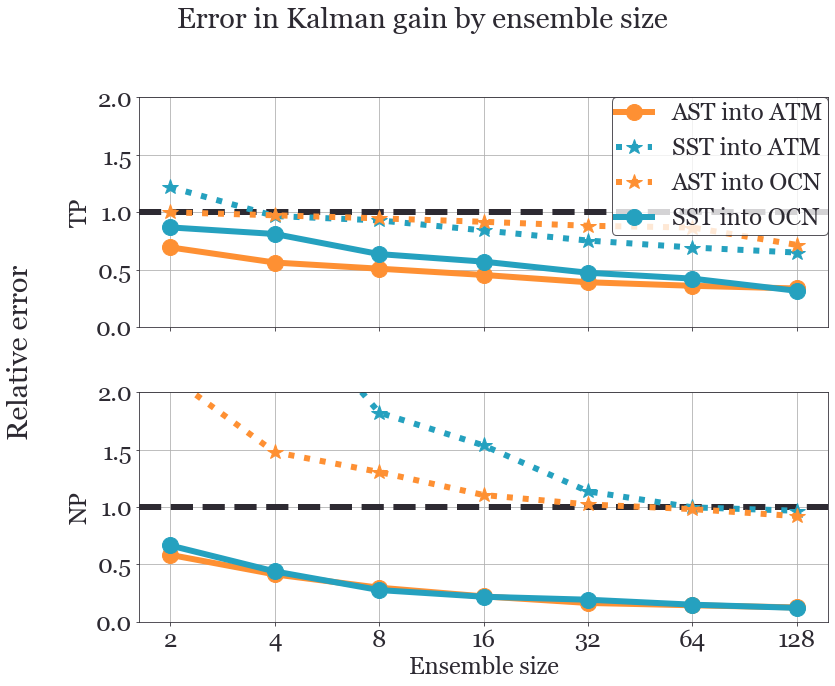

In [612]:
## Create subplots
fig, axs = plt.subplots(nrows=2, ncols=1, sharey=True, sharex='col') 

# Line at 1 for relative error
axs[0].axhline(y=1, color=raisin_black, linestyle='--', linewidth=6)
axs[1].axhline(y=1, color=raisin_black, linestyle='--', linewidth=6)

# AST into ATM
axs[0].plot(ens_sizes, ast_atm_tp, '-o', color=deep_saffron, linewidth=6, markersize=16, label='AST into ATM')
axs[1].plot(ens_sizes, ast_atm_np, '-o', color=deep_saffron, linewidth=6, markersize=16)

# SST into ATM
axs[0].plot(ens_sizes, sst_atm_tp, ':*', color=pacific_blue, linewidth=6, markersize=16, label='SST into ATM')
axs[1].plot(ens_sizes, sst_atm_np, ':*', color=pacific_blue, linewidth=6, markersize=16)

# AST into OCN
axs[0].plot(ens_sizes, ast_ocn_tp, ':*', color=deep_saffron, linewidth=6, markersize=16, label='AST into OCN')
axs[1].plot(ens_sizes, ast_ocn_np, ':*', color=deep_saffron, linewidth=6, markersize=16)

# SST into OCN
axs[0].plot(ens_sizes, sst_ocn_tp, '-o', color=pacific_blue, linewidth=6, markersize=16, label='SST into OCN')
axs[1].plot(ens_sizes, sst_ocn_np, '-o', color=pacific_blue, linewidth=6, markersize=16)



# Legend
leg = axs[0].legend(labelcolor=raisin_black, loc='upper right', borderaxespad=0,  borderpad=0.2, handlelength=1.5)
leg.get_frame().set_edgecolor(raisin_black)

# Label each subplot
axs[0].set_ylabel('TP', color=raisin_black)
axs[1].set_ylabel('NP', color=raisin_black)

# Adjust x axis
axs[1].set_xscale('log', base=2)
axs[1].set_xticks(ens_sizes)
axs[1].get_xaxis().set_major_formatter(ticker.ScalarFormatter())
axs[1].set_xlabel('Ensemble size', color=raisin_black)

# Adjust and label axes
axs[0].set_ylim([0,2])
fig.suptitle('Error in Kalman gain by ensemble size', color=raisin_black)
fig.supylabel('Relative error', color=raisin_black)


# Adjust aesthetics
plt.rcParams['figure.figsize'] = [12,10]
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(1/3)
    ax.spines['bottom'].set_color(raisin_black)
    ax.spines['top'].set_color(raisin_black) 
    ax.spines['right'].set_color(raisin_black)
    ax.spines['left'].set_color(raisin_black)
    ax.xaxis.label.set_color(raisin_black)
    ax.yaxis.label.set_color(raisin_black)
    ax.tick_params(colors=raisin_black, which='both') 
plt.subplots_adjust(hspace=.1)
plt.tight_layout()

# Save and show
plt.savefig(plot_dir+'/relative_error_by_ens_size_two_columns.pdf')
plt.show()

In [590]:
sst_ast_corr

<xarray.Dataset>
Dimensions:                        (lat: 180, lon: 360)
Coordinates:
  * lat                            (lat) float64 -89.5 -88.5 -87.5 ... 88.5 89.5
  * lon                            (lon) float64 0.5 1.5 2.5 ... 358.5 359.5
Data variables:
    __xarray_dataarray_variable__  (lat, lon) float64 -0.08249 ... 0.1949

In [595]:
sst_ast_corr['lat'].values[::5]

array([-89.5, -84.5, -79.5, -74.5, -69.5, -64.5, -59.5, -54.5, -49.5,
       -44.5, -39.5, -34.5, -29.5, -24.5, -19.5, -14.5,  -9.5,  -4.5,
         0.5,   5.5,  10.5,  15.5,  20.5,  25.5,  30.5,  35.5,  40.5,
        45.5,  50.5,  55.5,  60.5,  65.5,  70.5,  75.5,  80.5,  85.5])

In [593]:
36*72

2592

In [609]:
np.sum(indian_ocean['atm_slmsk'].values)

0.0

In [601]:
def check_land_mask(column):
    mask = np.sum(column['atm_slmsk'].sel()values)
    return (mask==0)

In [602]:
check_land_mask(south_pacific)

True